In [1]:
import sys
sys.path.append('..')

import os
import torch
import librosa.display
import matplotlib.pyplot as plt
from IPython.display import Audio
from inference_handlers.HiFiGanInferenceHandler import HiFiGanInferenceHandler
from hparams.HiFiGanHParams import HiFiGanHParams as hps
from dataset.HiFiGanDataset import HiFiGanDataset

In [2]:
print(os.listdir('/train_path/working_models'))
print(os.listdir('/train_path/hifigan_ckpt'))

['tacotron2_initial_training', 'hifigan_initial', 'tacotron2_initial_training_modified']
[]


In [3]:
inference_handler = HiFiGanInferenceHandler(
    '/train_path/working_models/hifigan_initial',
    use_cuda=True
)

In [4]:
sample_wav, sample_sr = HiFiGanDataset._load_wav('/train_path/test_wavs/LJ050-0269.wav')
# sample_wav, sr = HiFiGanDataset._load_wav('/train_path/test_wavs/LJ046-0193.wav')

In [5]:
Audio(sample_wav, rate=sample_sr)

In [6]:
mel_spec = HiFiGanDataset.mel_spectrogram(
    torch.FloatTensor(sample_wav / hps.max_wav_value).unsqueeze(0),
    n_fft=hps.n_fft,
    num_mels=hps.num_mels,
    sampling_rate=hps.sampling_rate,
    hop_size=hps.hop_size,
    win_size=hps.win_size,
    fmin=hps.fmin,
    fmax=hps.fmax_for_loss,
)

In [7]:
predicted_wav, predicted_sr = inference_handler.infer(mel_spec)

Removing weight norm...


In [8]:
Audio(predicted_wav, rate=predicted_sr)

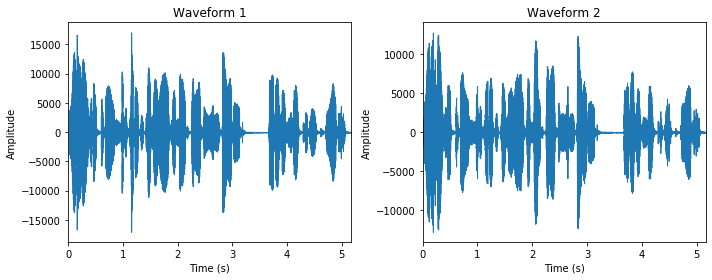

In [9]:
plt.figure(figsize=(10, 4))

# Plot the original waveform
plt.subplot(1, 2, 1)
librosa.display.waveplot(sample_wav.astype('float32'), sr=sample_sr)
plt.title('Sample Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the predicted waveform
plt.subplot(1, 2, 2)
librosa.display.waveplot(predicted_wav.astype('float32'), sr=predicted_sr)
plt.title('Predicted Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

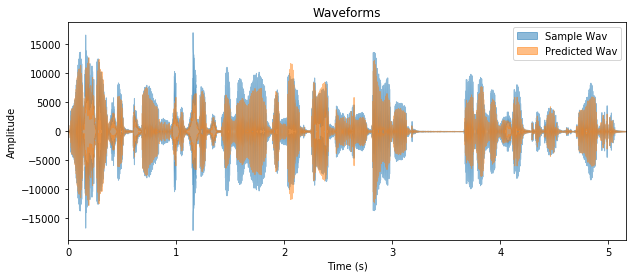

In [10]:
plt.figure(figsize=(10, 4))
librosa.display.waveplot(sample_wav.astype('float32'), sr=sample_sr, alpha=0.5, label="Sample Wav")
librosa.display.waveplot(predicted_wav.astype('float32'), sr=predicted_sr, alpha=0.5, label="Predicted Wav")
plt.title('Waveforms')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()


In [11]:
predicted_mel = HiFiGanDataset.mel_spectrogram(
    torch.FloatTensor(predicted_wav / hps.max_wav_value).unsqueeze(0),
    n_fft=hps.n_fft,
    num_mels=hps.num_mels,
    sampling_rate=hps.sampling_rate,
    hop_size=hps.hop_size,
    win_size=hps.win_size,
    fmin=hps.fmin,
    fmax=hps.fmax_for_loss,
)

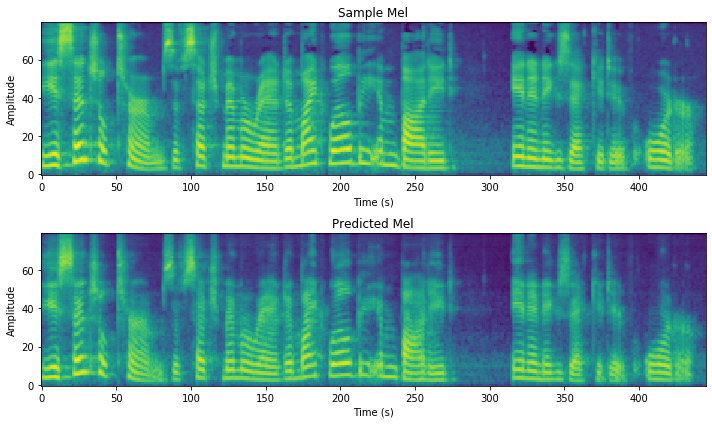

In [18]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.imshow(mel_spec[0], aspect="auto", origin="lower", interpolation="none")
plt.title('Sample Mel')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

# Plot the predicted waveform
plt.subplot(2, 1, 2)
plt.imshow(predicted_mel[0], aspect="auto", origin="lower", interpolation="none")
plt.title('Predicted Mel')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()
